<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Activation Functions</H1></u></center>

In [7]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
                                
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)  

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1



In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import numpy as np

In [9]:
(X_train_, y_train_), (X_test_, y_test_) = mnist.load_data()

## Data Preprocessing:

In [10]:
# Normalize data
X_train = X_train_.astype('float32') / 255.
X_test = X_test_.astype('float32') / 255.

In [11]:
# One hot encoding labels
y_train = to_categorical(y_train_, 10)
y_test = to_categorical(y_test_, 10)

In [12]:
# Flatten data
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

## Creating NN with sigmoid activation function:

In [13]:
nn_sigmoid = Sequential()
nn_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(350, activation='sigmoid'))
nn_sigmoid.add(Dense(100, activation='sigmoid'))
nn_sigmoid.add(Dense(10, activation='softmax'))

In [14]:
# Compile model with SGD
nn_sigmoid.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

## Creating NN with the ReLU activation function:

In [15]:
nn_relu = Sequential()
nn_relu.add(Dense(700, input_dim=784, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(350, activation='relu'))
nn_relu.add(Dense(100, activation='relu'))
nn_relu.add(Dense(10, activation='softmax'))

In [16]:
# Compile model with SGD
nn_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Creating NN with the ELU activation function:

In [17]:
nn_elu = Sequential()
nn_elu.add(Dense(700, input_dim=784, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(350, activation='elu'))
nn_elu.add(Dense(100, activation='elu'))
nn_elu.add(Dense(10, activation='softmax'))

In [18]:
# Compile model with SGD
nn_elu.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

## Callback function to store the loss values per batch:

In [19]:
import keras
class history_loss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

## Training the models

In [20]:
n_epochs = 20
batch_size = 256
validation_split = 0.2

In [21]:
history_sigmoid = history_loss()
nn_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_sigmoid], validation_split=validation_split, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 2.3095 - accuracy: 0.1101 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/20
 - 1s - loss: 2.3013 - accuracy: 0.1138 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 3/20
 - 1s - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 4/20
 - 1s - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3029 - val_accuracy: 0.1060
Epoch 5/20
 - 1s - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3030 - val_accuracy: 0.1060
Epoch 6/20
 - 1s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3027 - val_accuracy: 0.1060
Epoch 7/20
 - 1s - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3027 - val_accuracy: 0.1060
Epoch 8/20
 - 1s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 9/20
 - 1s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 10/20
 - 1s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3018 - val_accuracy: 0.1060
Epoch 11/20
 - 1s -

In [22]:
history_relu = history_loss()
nn_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_relu], validation_split=validation_split, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 2.2270 - accuracy: 0.3988 - val_loss: 2.0676 - val_accuracy: 0.6408
Epoch 2/20
 - 1s - loss: 1.4315 - accuracy: 0.7268 - val_loss: 0.7368 - val_accuracy: 0.8236
Epoch 3/20
 - 1s - loss: 0.5595 - accuracy: 0.8459 - val_loss: 0.4573 - val_accuracy: 0.8648
Epoch 4/20
 - 1s - loss: 0.4011 - accuracy: 0.8846 - val_loss: 0.3484 - val_accuracy: 0.8975
Epoch 5/20
 - 1s - loss: 0.3348 - accuracy: 0.9025 - val_loss: 0.3298 - val_accuracy: 0.9035
Epoch 6/20
 - 1s - loss: 0.2929 - accuracy: 0.9137 - val_loss: 0.2662 - val_accuracy: 0.9247
Epoch 7/20
 - 1s - loss: 0.2623 - accuracy: 0.9227 - val_loss: 0.2517 - val_accuracy: 0.9278
Epoch 8/20
 - 1s - loss: 0.2419 - accuracy: 0.9284 - val_loss: 0.2345 - val_accuracy: 0.9321
Epoch 9/20
 - 1s - loss: 0.2217 - accuracy: 0.9351 - val_loss: 0.2074 - val_accuracy: 0.9393
Epoch 10/20
 - 1s - loss: 0.2059 - accuracy: 0.9399 - val_loss: 0.1990 - val_accuracy: 0.9442
Epoch 11/20
 - 1s -

In [23]:
history_elu = history_loss()
nn_elu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_elu], validation_split=validation_split, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.8154 - accuracy: 0.8060 - val_loss: 0.4189 - val_accuracy: 0.8881
Epoch 2/20
 - 1s - loss: 0.3893 - accuracy: 0.8925 - val_loss: 0.3275 - val_accuracy: 0.9054
Epoch 3/20
 - 1s - loss: 0.3276 - accuracy: 0.9060 - val_loss: 0.2923 - val_accuracy: 0.9143
Epoch 4/20
 - 1s - loss: 0.2961 - accuracy: 0.9138 - val_loss: 0.2708 - val_accuracy: 0.9212
Epoch 5/20
 - 1s - loss: 0.2746 - accuracy: 0.9204 - val_loss: 0.2553 - val_accuracy: 0.9242
Epoch 6/20
 - 1s - loss: 0.2574 - accuracy: 0.9247 - val_loss: 0.2429 - val_accuracy: 0.9285
Epoch 7/20
 - 1s - loss: 0.2428 - accuracy: 0.9291 - val_loss: 0.2337 - val_accuracy: 0.9314
Epoch 8/20
 - 1s - loss: 0.2304 - accuracy: 0.9328 - val_loss: 0.2230 - val_accuracy: 0.9348
Epoch 9/20
 - 1s - loss: 0.2189 - accuracy: 0.9357 - val_loss: 0.2122 - val_accuracy: 0.9384
Epoch 10/20
 - 1s - loss: 0.2083 - accuracy: 0.9391 - val_loss: 0.2056 - val_accuracy: 0.9407
Epoch 11/20
 - 1s -

## Plotting the losses:

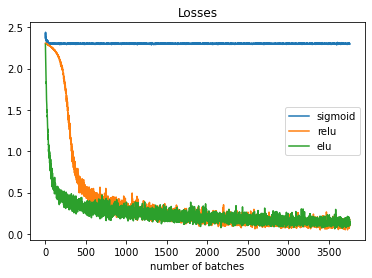

In [25]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(history_sigmoid.losses)),history_sigmoid.losses,label='sigmoid' )
plt.plot(np.arange(len(history_relu.losses)),history_relu.losses ,label='relu' )
plt.plot(np.arange(len(history_elu.losses)),history_elu.losses ,label='elu' )
plt.title('Losses')
plt.xlabel('number of batches')
plt.legend(loc='best')
plt.show()

## References:

https://arxiv.org/abs/1511.07289v1